In [1]:
# importing required modules
import pylab as pl
import pandas as pd
import numpy as np
from numpy import ma
%pylab inline
import os
import scipy.stats
import datetime as dt
import urllib2 as url
from zipfile import ZipFile
from StringIO import StringIO
import matplotlib.dates as mdates
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [2]:
a = url.urlopen("https://s3.amazonaws.com/tripdata/201307-citibike-tripdata.zip").read()
file= ZipFile(StringIO(a))
bikedata1 = file.open("2013-07 - Citi Bike trip data.csv")
july2013 = pd.read_csv(bikedata1, parse_dates=[0], infer_datetime_format=True)
print july2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [3]:
b = url.urlopen("https://s3.amazonaws.com/tripdata/201308-citibike-tripdata.zip").read()
file= ZipFile(StringIO(b))
bikedata2 = file.open("2013-08 - Citi Bike trip data.csv")
aug2013 = pd.read_csv(bikedata2, parse_dates=[0], infer_datetime_format=True)
print aug2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [4]:
c = url.urlopen("https://s3.amazonaws.com/tripdata/201309-citibike-tripdata.zip").read()
file= ZipFile(StringIO(c))
bikedata3 = file.open("2013-09 - Citi Bike trip data.csv")
sep2013 = pd.read_csv(bikedata3, parse_dates=[0], infer_datetime_format=True)
print sep2013.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [5]:
CSlist = ['Washington Pl & Broadway', 'Washington Square E', 'LaGuardia Pl & W 3 St', 'Sullivan St & Washington Sq', \
         'MacDougal St & Washington Sq', 'Washington Pl & 6 Ave']
july2013a = july2013[july2013['start station name'].isin(CSlist)]
temp = pd.DatetimeIndex(july2013a['starttime'])
july2013a['startdate'] = temp.date
july2013a['starttimes'] = temp.time
del july2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
aug2013a = aug2013[aug2013['start station name'].isin(CSlist)]
temp1 = pd.DatetimeIndex(aug2013a['starttime'])
aug2013a['startdate'] = temp1.date
aug2013a['starttimes'] = temp1.time
del aug2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#aug2013a.head()

In [8]:
sep2013a = sep2013[sep2013['start station name'].isin(CSlist)]
temp2 = pd.DatetimeIndex(sep2013a['starttime'])
sep2013a['startdate'] = temp2.date
sep2013a['starttimes'] = temp2.time
del sep2013a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
#sep2013a.head()

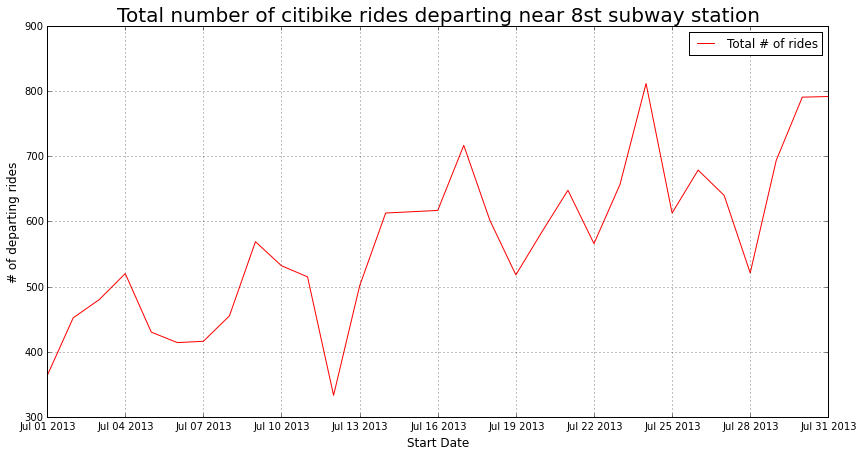

In [10]:
ax = july2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax.set_xlabel("Start Date", fontsize = 12)
ax.set_ylabel("# of departing rides", fontsize = 12)
ax.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

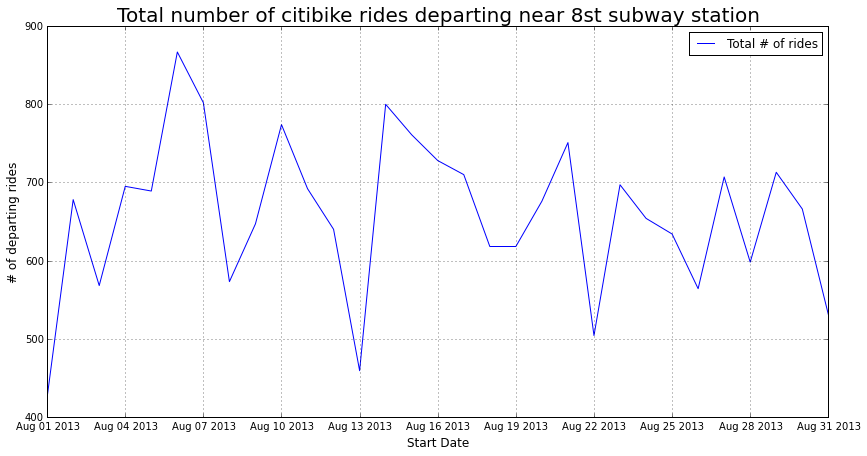

In [11]:
ax1 = aug2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='blue', \
                                                 grid=True)
ax1.set_xlabel("Start Date", fontsize = 12)
ax1.set_ylabel("# of departing rides", fontsize = 12)
ax1.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

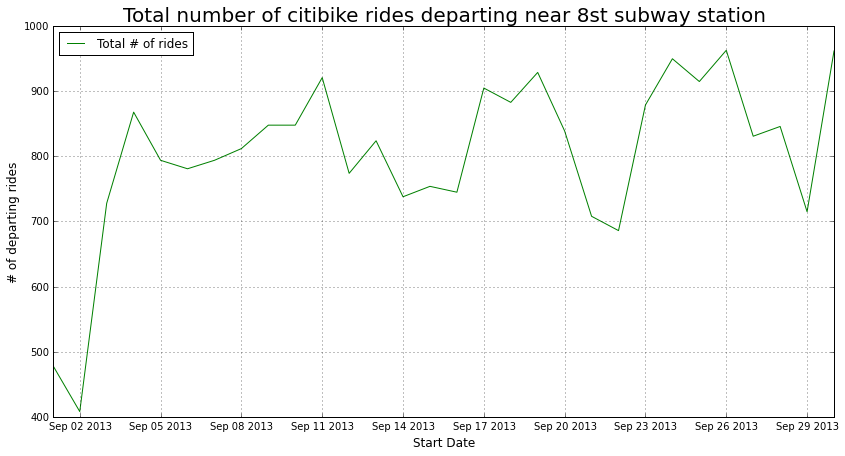

In [12]:
ax3 = sep2013a.groupby('startdate').count().plot(y='tripduration', figsize=(14,7), label="Total # of rides", color='green', \
                                                 grid=True)
ax3.set_xlabel("Start Date", fontsize = 12)
ax3.set_ylabel("# of departing rides", fontsize = 12)
ax3.set_title("Total number of citibike rides departing near 8st subway station", fontsize = 20)

In [13]:
bikesum13 = july2013a.append([aug2013a, sep2013a])

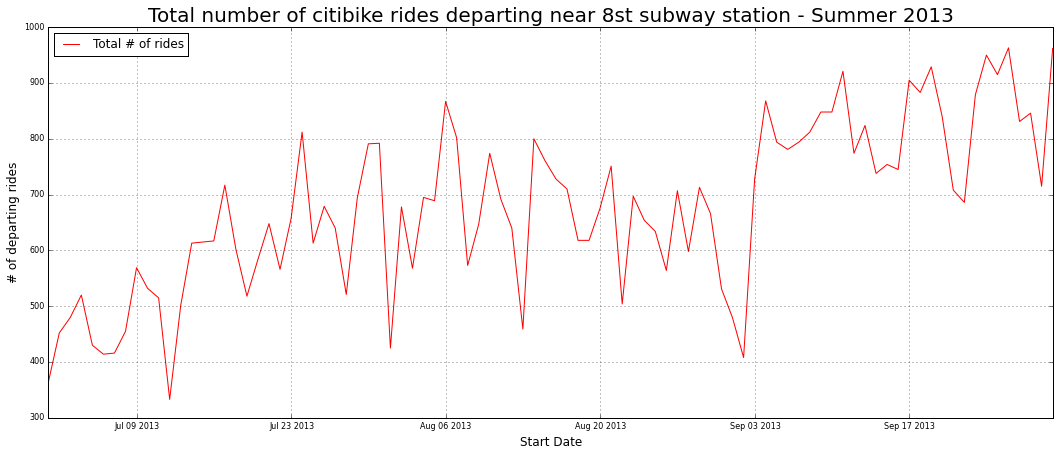

In [14]:
ax7 = bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax7.set_xlabel("Start Date", fontsize = 12)
ax7.set_ylabel("# of departing rides", fontsize = 12)
ax7.set_title("Total number of citibike rides departing near 8st subway station - Summer 2013", fontsize = 20)
ax7.tick_params(labelsize = 8)

In [15]:
bikesum13.groupby('startdate').count().tripduration.describe()

count     92.000000
mean     676.358696
std      150.641747
min      333.000000
25%      568.750000
50%      687.500000
75%      792.500000
max      963.000000
Name: tripduration, dtype: float64

In [16]:
subjul121 = pd.read_csv('turnstile_120707.txt')
subjul122 = pd.read_csv('turnstile_120714.txt')
subjul123 = pd.read_csv('turnstile_120721.txt')
subjul124 = pd.read_csv('turnstile_120728.txt')
subjul125 = pd.read_csv('turnstile_120804.txt')

subjul12 = subjul121.append([subjul122, subjul123, subjul124, subjul125])
print subjul12.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')


In [17]:
CAlist = ['A038' , 'A039']
subjul12a = subjul12[subjul12["C/A"].isin(CAlist)]
subjul12a['DATE11'] =  pd.to_datetime(subjul12a['DATE1'])
subjul12a['DATE12']= pd.DatetimeIndex(subjul12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [18]:
#subjul12a.head()

In [19]:
subjul12b = subjul12a.groupby(subjul12a.DATE12).sum()
#subjul12b.head()

In [20]:
subjul12c = subjul12b.drop(subjul12b.index[[0, -1, -2, -3]])

In [21]:
subjul12c['users'] = subjul12c.ENTRIES6-subjul12c.ENTRIES1

In [22]:
#subjul12c.users

In [23]:
subjul12c.users[subjul12c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [24]:
#subjul12c.users

In [25]:
subjul12c.users = subjul12c.users.fillna(subjul12c.users.mean())
subjul12c.users

DATE12
2012-07-01     6147.000000
2012-07-02    13476.000000
2012-07-03    12707.000000
2012-07-04     6365.000000
2012-07-05    10113.000000
2012-07-06    10311.777778
2012-07-07     6717.000000
2012-07-08     7812.000000
2012-07-09    13670.000000
2012-07-10    12681.000000
2012-07-11     7740.000000
2012-07-12    15530.000000
2012-07-13    10311.777778
2012-07-14     7984.000000
2012-07-15     7679.000000
2012-07-16    15493.000000
2012-07-17    10698.000000
2012-07-18     9199.000000
2012-07-19     9589.000000
2012-07-20    10311.777778
2012-07-21     6141.000000
2012-07-22     8149.000000
2012-07-23    13454.000000
2012-07-24    10184.000000
2012-07-25    10156.000000
2012-07-26    15343.000000
2012-07-27    10311.777778
2012-07-28     6805.000000
2012-07-29     7011.000000
2012-07-30    15188.000000
2012-07-31    12387.000000
Name: users, dtype: float64

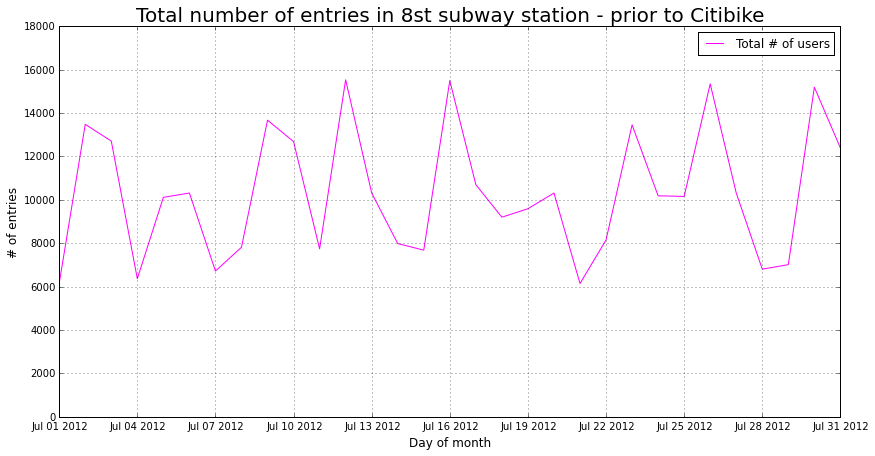

In [26]:
ax4 = subjul12c.plot(y='users', figsize=(14,7), label="Total # of users", color='Magenta', \
                                                 grid=True, ylim = (0, 18000))
ax4.set_xlabel("Day of month", fontsize = 12)
ax4.set_ylabel("# of entries", fontsize = 12)
ax4.set_title("Total number of entries in 8st subway station - prior to Citibike", fontsize = 20)

In [27]:
subjul12c.users.describe()

count       31.000000
mean     10311.777778
std       2990.537559
min       6141.000000
25%       7776.000000
50%      10184.000000
75%      12694.000000
max      15530.000000
Name: users, dtype: float64

In [28]:
subaug121 = pd.read_csv('turnstile_120804.txt')
subaug122 = pd.read_csv('turnstile_120811.txt')
subaug123 = pd.read_csv('turnstile_120818.txt')
subaug124 = pd.read_csv('turnstile_120825.txt')
subsep121 = pd.read_csv('turnstile_120901.txt')

In [29]:
subaug12 = subaug121.append([subaug122, subaug123, subaug124, subsep121])

In [30]:
#subaug12.head()

In [31]:
subaug12a = subaug12[subaug12["C/A"].isin(CAlist)]
subaug12a['DATE11'] =  pd.to_datetime(subaug12a.DATE1)
subaug12a['DATE12']= pd.DatetimeIndex(subaug12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [32]:
#subaug12a.head()

In [33]:
subaug12b = subaug12a.groupby(subaug12a.DATE12).sum()
subaug12b.head()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2012-07-28,22524103,19780326,22525448,19780768,22525526,19780955,22526099,19782082,22527820,19784498,22530908,19787586,22534268,19789950,22536643,19790764
2012-07-29,24039610,28333278,24039981,28334295,24040595,28334723,24041580,28335242,24043808,28337221,24046621,28339291,24048879,28340632,24049354,28341368
2012-07-30,22547694,19799975,22549234,19801652,22551658,19802942,22555972,19805454,22560866,19807175,22562882,19808245,22564367,19810805,22565447,19812760
2012-07-31,21063538,11267434,21065909,11268649,21069084,11270216,21072455,11272349,21074458,11273757,21075925,11276120,21077926,11277023,21080024,11277763
2012-08-01,26805644,22647341,26808876,22649844,26812553,22652054,26815919,22654869,26818516,22656505,26820730,22657928,26822907,22659041,26825825,22660851


In [34]:
subaug12c = subaug12b.drop(subaug12b.index[[0, 1, 2, 3]])

In [35]:
subaug12c['users'] = subaug12c.ENTRIES6-subaug12c.ENTRIES1

In [36]:
#subaug12c.users

In [37]:
subaug12c.users[subaug12c.users < 0] = np.nan
#subaug12c.users

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [38]:
subaug12c.users = subaug12c.users.fillna(subaug12c.users.mean())
subaug12c.users

DATE12
2012-08-01    15086.000000
2012-08-02     9808.000000
2012-08-03     9300.153846
2012-08-04     7539.000000
2012-08-05     8103.000000
2012-08-06    14256.000000
2012-08-07    12319.000000
2012-08-08    11379.000000
2012-08-09     9556.000000
2012-08-10     9300.153846
2012-08-11     3704.000000
2012-08-12     2861.000000
2012-08-13    10599.000000
2012-08-14     8622.000000
2012-08-15     4248.000000
2012-08-16    11686.000000
2012-08-17     9300.153846
2012-08-18     6776.000000
2012-08-19     7623.000000
2012-08-20    14376.000000
2012-08-21    11755.000000
2012-08-22     7509.000000
2012-08-23     6258.000000
2012-08-24     9300.153846
2012-08-25     5721.000000
2012-08-26     5887.000000
2012-08-27    14115.000000
2012-08-28    13918.000000
2012-08-29    10745.000000
2012-08-30     7355.000000
2012-08-31     9300.153846
Name: users, dtype: float64

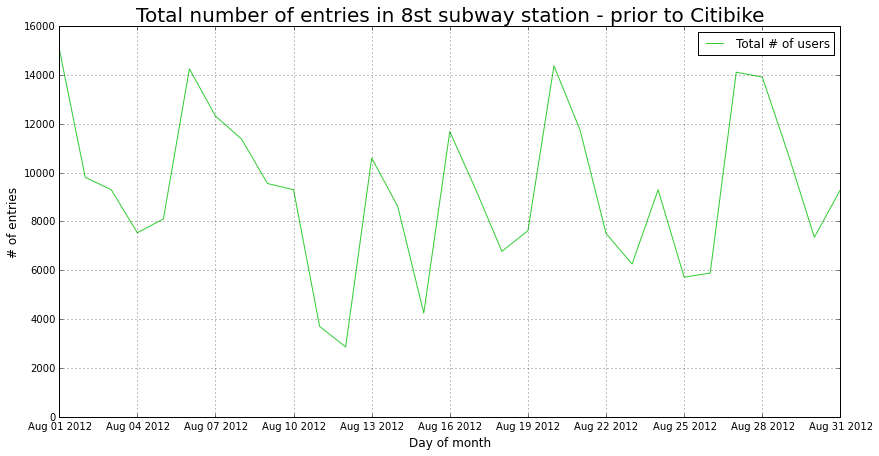

In [39]:
ax5 = subaug12c.plot(y='users', figsize=(14,7), label="Total # of users", color='LimeGreen', \
                                                 grid=True, ylim = (0, 16000))
ax5.set_xlabel("Day of month", fontsize = 12)
ax5.set_ylabel("# of entries", fontsize = 12)
ax5.set_title("Total number of entries in 8st subway station - prior to Citibike", fontsize = 20)

In [40]:
subaug12c.users.describe()

count       31.000000
mean      9300.153846
std       3218.429976
min       2861.000000
25%       7432.000000
50%       9300.153846
75%      11532.500000
max      15086.000000
Name: users, dtype: float64

In [41]:
subsep122 = pd.read_csv('turnstile_120908.txt')
subsep123 = pd.read_csv('turnstile_120915.txt')
subsep124 = pd.read_csv('turnstile_120922.txt')
subsep125 = pd.read_csv('turnstile_120929.txt')
subsep126 = pd.read_csv('turnstile_121006.txt')
subsep12 = subsep121.append([subsep122, subsep123, subsep124, subsep125, subsep126])
subsep12.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [42]:
subsep12a = subsep12[subsep12["C/A"].isin(CAlist)]
subsep12a['DATE11'] =  pd.to_datetime(subsep12a.DATE1)
subsep12a['DATE12']= pd.DatetimeIndex(subsep12a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [43]:
subsep12b = subsep12a.groupby(subsep12a.DATE12).sum()
#subsep12b

In [44]:
subsep12c = subsep12b.drop(subsep12b.index[[0, 1, 2, 3, 4, 5, 6, -1, -2, -3, -4, -5]])

In [45]:
subsep12c['users'] = subsep12c.ENTRIES6-subsep12c.ENTRIES1

In [46]:
#subsep12c.users

In [47]:
subsep12c.users[subsep12c.users < 0] = np.nan
#subsep12c.users

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [48]:
subsep12c.users = subsep12c.users.fillna(subsep12c.users.mean())
subsep12c.users

DATE12
2012-09-01     4004.000000
2012-09-02     4796.000000
2012-09-03     8629.000000
2012-09-04    14019.000000
2012-09-05    12347.000000
2012-09-06    10481.000000
2012-09-07     9757.730769
2012-09-08     4210.000000
2012-09-09     5540.000000
2012-09-10    16394.000000
2012-09-11    14735.000000
2012-09-12     9879.000000
2012-09-13     8568.000000
2012-09-14     9757.730769
2012-09-15     4516.000000
2012-09-16     5795.000000
2012-09-17    12600.000000
2012-09-18    11283.000000
2012-09-19    12693.000000
2012-09-20    13315.000000
2012-09-21     9757.730769
2012-09-22     5269.000000
2012-09-23     5904.000000
2012-09-24    16175.000000
2012-09-25    14658.000000
2012-09-26     9809.000000
2012-09-27     9070.000000
2012-09-28     9757.730769
2012-09-29     9888.000000
2012-09-30     9124.000000
Name: users, dtype: float64

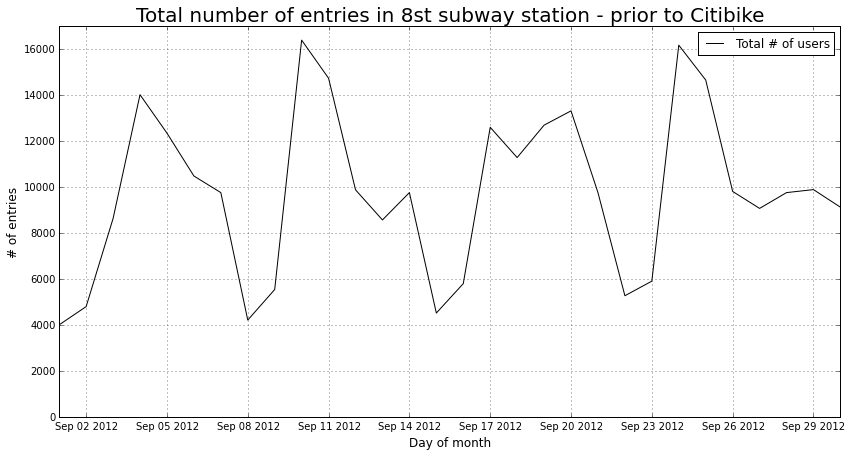

In [49]:
ax6 = subsep12c.plot(y='users', figsize=(14,7), label="Total # of users", color='Black', \
                                                 grid=True, ylim = (0, 17000))
ax6.set_xlabel("Day of month", fontsize = 12)
ax6.set_ylabel("# of entries", fontsize = 12)
ax6.set_title("Total number of entries in 8st subway station - prior to Citibike", fontsize = 20)

In [50]:
subsep12c.users.describe()

count       30.000000
mean      9757.730769
std       3615.751399
min       4004.000000
25%       6570.000000
50%       9757.730769
75%      12536.750000
max      16394.000000
Name: users, dtype: float64

In [51]:
subsum12 = subjul12c.append([subaug12c, subsep12c])

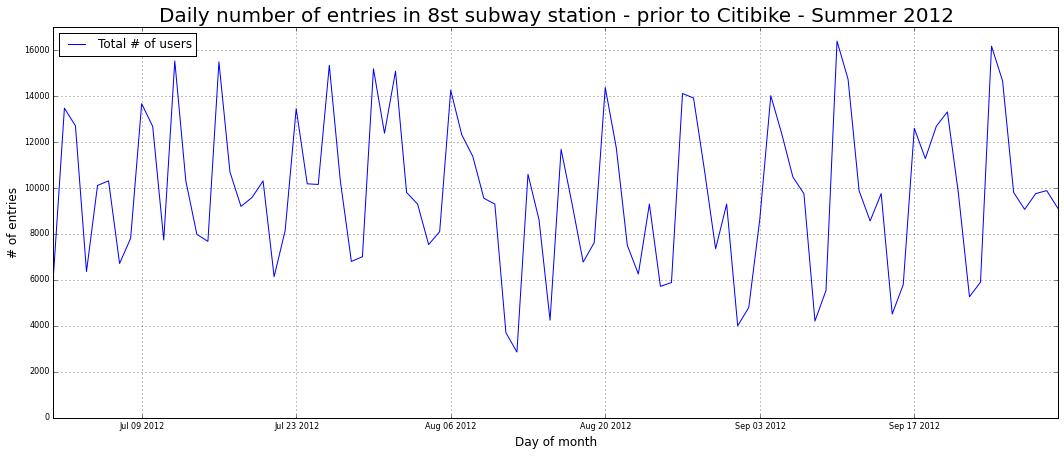

In [52]:
ax6 = subsum12.plot(y='users', figsize=(18,7), label="Total # of users", \
                                                 grid=True, ylim = (0, 17000))
ax6.set_xlabel("Day of month", fontsize = 12)
ax6.set_ylabel("# of entries", fontsize = 12)
ax6.set_title("Daily number of entries in 8st subway station - prior to Citibike - Summer 2012", fontsize = 20)
ax6.tick_params(labelsize = 8)

In [53]:
subsum12.users.describe()

count       92.000000
mean      9790.236994
std       3271.746775
min       2861.000000
25%       7531.500000
50%       9757.730769
75%      12357.000000
max      16394.000000
Name: users, dtype: float64

In [54]:
subsum131 = pd.read_csv('turnstile_130629.txt')
subsum132 = pd.read_csv('turnstile_130706.txt')
subsum133 = pd.read_csv('turnstile_130713.txt')
subsum134 = pd.read_csv('turnstile_130720.txt')
subsum135 = pd.read_csv('turnstile_130727.txt')
subsum136 = pd.read_csv('turnstile_130803.txt')
subsum137 = pd.read_csv('turnstile_130810.txt')
subsum138 = pd.read_csv('turnstile_130817.txt')
subsum139 = pd.read_csv('turnstile_130824.txt')
subsum1310 = pd.read_csv('turnstile_130831.txt')
subsum1311 = pd.read_csv('turnstile_130907.txt')
subsum1312 = pd.read_csv('turnstile_130914.txt')
subsum1313 = pd.read_csv('turnstile_130921.txt')
subsum1314 = pd.read_csv('turnstile_130928.txt')
subsum1315 = pd.read_csv('turnstile_131005.txt')

subsum13 = subsum131.append([subsum132, subsum133, subsum134, subsum135, subsum136, subsum137, subsum138\
                             , subsum139, subsum1310, subsum1311, subsum1312, subsum1313, subsum1314, subsum1315])
subsum13.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [55]:
subsum13a = subsum13[subsum13["C/A"].isin(CAlist)]
subsum13a['DATE11'] = pd.to_datetime(subsum13a.DATE1)
subsum13a['DATE12'] = pd.DatetimeIndex(subsum13a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [56]:
subsum13b = subsum13a.groupby(subsum13a.DATE12).sum()
subsum13b.head()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2013-06-22,125876413,23044269,125877646,23044629,125878000,23044919,125879338,23046444,125882574,23048804,125886641,23051946,125890451,23054003,125891652,23054448
2013-06-23,125891756,23054575,125892329,23055479,125894237,23057492,125897475,23059783,125900270,23061048,125901882,23061310,125902308,23061842,125903458,23063589
2013-06-24,151812431,46379934,151816726,46382736,151819961,46384553,151821758,46385406,151822806,46386102,151823497,46387305,151825158,46389546,151827879,46391967
2013-06-25,124320265,13949376,124323393,13950846,124325494,13951770,124326561,13952575,124327138,13953821,124328430,13955745,124330717,13958228,124332996,13959425
2013-06-26,116983417,17850718,116984764,17851330,116986594,17852253,116988532,17854144,116991235,17855589,116993818,17856909,116995367,17857824,116997380,17858819


In [57]:
subsum13c = subsum13b.drop(subsum13b.index[[0, 1, 2, 3, 4, 5, 6, 7, 8, -1, -2, -3, -4]])

In [58]:
subsum13c

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2013-07-01,126010850,23142777,126013065,23144918,126016816,23147775,126020341,23149977,126023517,23151029,126024886,23151860,126025872,23153445,126027711,23155462
2013-07-02,121370338,20052296,121374406,20054820,121377122,20056166,121379673,20057058,121381062,20058015,121381834,20059445,121383355,20061871,121385841,20064119
2013-07-03,120894693,8012353,120897255,8013418,120899789,8014153,120901192,8014773,120902063,8015284,120903223,8016024,120904362,8016824,120905277,8017524
2013-07-04,23950228,21653204,23951347,21653696,23952286,21654226,23952946,21654814,23953532,21655583,23953974,21656192,23954593,21656741,23955673,21657471
2013-07-05,126068957,23183288,112957609,20096145,107269404,16689793,103689604,3199377,102112915,1526991,101945182,649337,772967,601526,773269,601843
2013-07-06,126076981,23190129,126077897,23190363,126077932,23190448,126078247,23190981,126079263,23192354,126081614,23194479,126084453,23196526,126086642,23197726
2013-07-07,126087358,23197975,126087521,23198360,126088096,23199357,126089523,23200975,126091632,23202672,126093524,23203484,126094482,23203916,126095040,23205309
2013-07-08,126096508,23207245,126099943,23209751,126104094,23212317,126107256,23213634,126109153,23214555,126110116,23215911,126111039,23216976,126113234,23219481
2013-07-09,117865179,6610675,117868981,6613040,117872228,6614432,117874282,6615175,117875285,6615750,117876280,6617028,117877916,6618299,117881420,6620575


In [59]:
subsum13c['users'] = subsum13c.ENTRIES6-subsum13c.ENTRIES1

In [60]:
subsum13c.users

DATE12
2013-07-01        14036
2013-07-02        11496
2013-07-03         8530
2013-07-04         3746
2013-07-05    -24123775
2013-07-06         4633
2013-07-07         6166
2013-07-08        13608
2013-07-09        11101
2013-07-10         7221
2013-07-11         9190
2013-07-12    -10012121
2013-07-13         7286
2013-07-14         7356
2013-07-15        14042
2013-07-16         9786
2013-07-17         7230
2013-07-18        12166
2013-07-19   -120545436
2013-07-20         6870
2013-07-21         5470
2013-07-22        13212
2013-07-23        12577
2013-07-24        10622
2013-07-25        12235
2013-07-26          NaN
2013-07-27         7014
2013-07-28         7286
2013-07-29        14050
2013-07-30        11894
                ...    
2013-09-01         7065
2013-09-02         6770
2013-09-03        11930
2013-09-04         8330
2013-09-05         7723
2013-09-06   -107697478
2013-09-07         7677
2013-09-08         7599
2013-09-09        14775
2013-09-10         9045
2013-09-1

In [61]:
subsum13c.users[subsum13c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [62]:
subsum13c.users = subsum13c.users.fillna(subsum13c.users.mean())
subsum13c.users

DATE12
2013-07-01    14036.000000
2013-07-02    11496.000000
2013-07-03     8530.000000
2013-07-04     3746.000000
2013-07-05     9267.113924
2013-07-06     4633.000000
2013-07-07     6166.000000
2013-07-08    13608.000000
2013-07-09    11101.000000
2013-07-10     7221.000000
2013-07-11     9190.000000
2013-07-12     9267.113924
2013-07-13     7286.000000
2013-07-14     7356.000000
2013-07-15    14042.000000
2013-07-16     9786.000000
2013-07-17     7230.000000
2013-07-18    12166.000000
2013-07-19     9267.113924
2013-07-20     6870.000000
2013-07-21     5470.000000
2013-07-22    13212.000000
2013-07-23    12577.000000
2013-07-24    10622.000000
2013-07-25    12235.000000
2013-07-26     9267.113924
2013-07-27     7014.000000
2013-07-28     7286.000000
2013-07-29    14050.000000
2013-07-30    11894.000000
                  ...     
2013-09-01     7065.000000
2013-09-02     6770.000000
2013-09-03    11930.000000
2013-09-04     8330.000000
2013-09-05     7723.000000
2013-09-06     9267.1

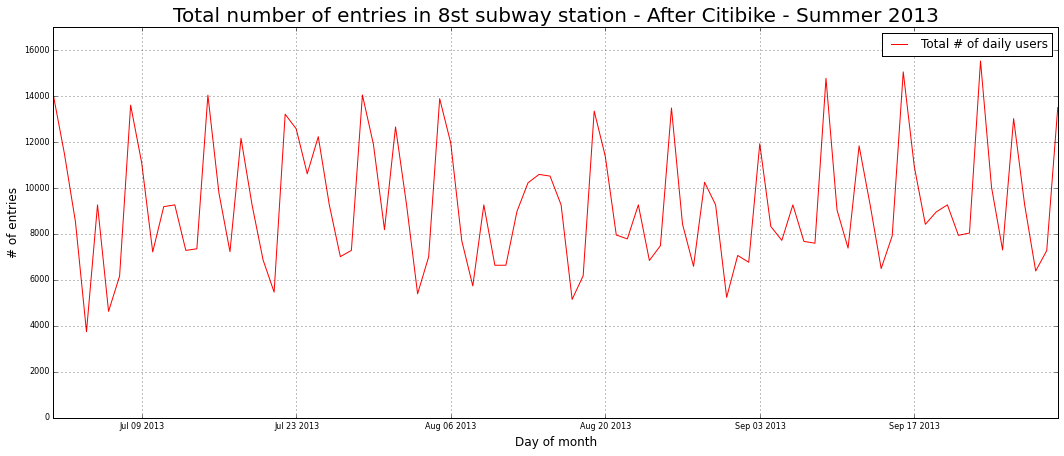

In [63]:
ax8 = subsum13c.plot(y='users', figsize=(18,7), label="Total # of daily users", color = 'Red', \
                                                 grid=True, ylim = (0, 17000))
ax8.set_xlabel("Day of month", fontsize = 12)
ax8.set_ylabel("# of entries", fontsize = 12)
ax8.set_title("Total number of entries in 8st subway station - After Citibike - Summer 2013", fontsize = 20)
ax8.tick_params(labelsize = 8)

In [64]:
subsum13c.users.describe()

count       92.000000
mean      9267.113924
std       2689.877067
min       3746.000000
25%       7284.250000
50%       9117.500000
75%      11173.500000
max      15530.000000
Name: users, dtype: float64

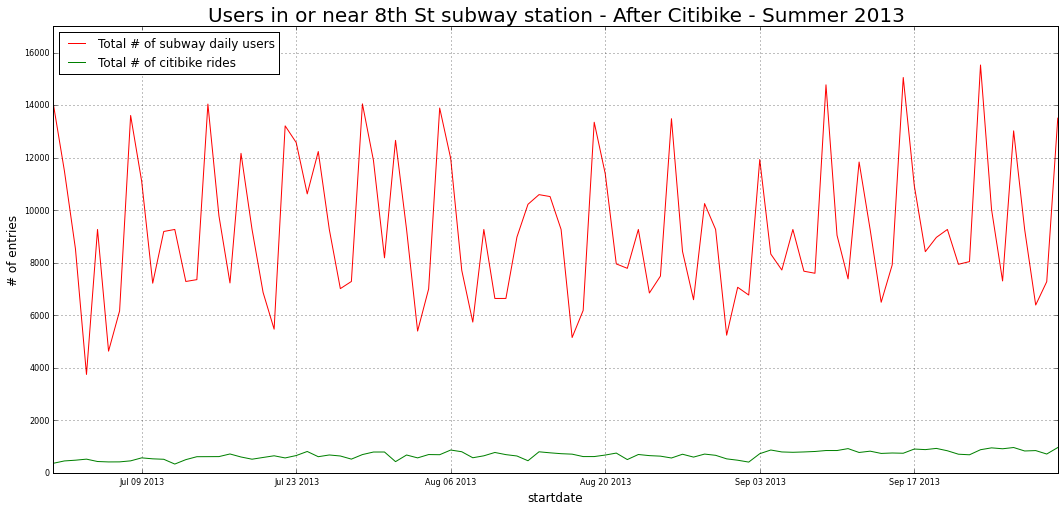

In [65]:
ax8 = subsum13c.plot(y='users', figsize=(18,8), label="Total # of subway daily users", color = 'Red', \
                                                 grid=True, ylim = (0, 17000))
ax8.set_xlabel("Day of month", fontsize = 12)
ax8.set_ylabel("# of entries", fontsize = 12)
ax8.set_title("Users in or near 8th St subway station - After Citibike - Summer 2013", fontsize = 20)
ax8.tick_params(labelsize = 8)
bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax8)

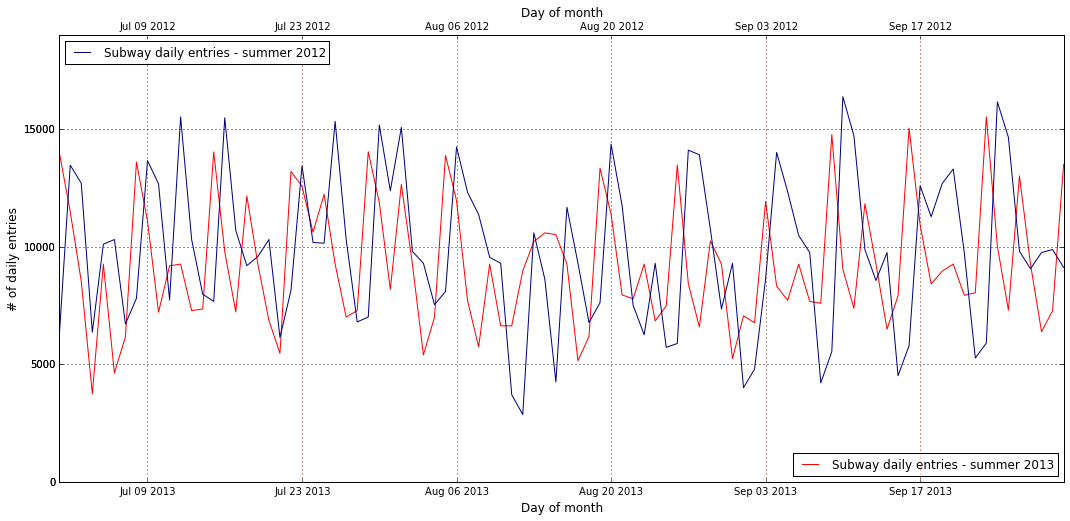

In [71]:
plt.figure(figsize=(18, 7))
ax1 = subsum13c.users.plot(y='users', figsize=(18,8), label="Subway daily entries - summer 2013", color = 'Red',
                              grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=4)

ax1.set_xlabel("Day of month", fontsize = 12)
ax1.set_ylabel("# of daily entries", fontsize = 12)

ax2 = ax1.twiny()
subsum12.users.plot(y='users', figsize=(18,8), label="Subway daily entries - summer 2012", color = 'Navy',
                       grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=2)

ax2.grid(color="red", axis="x")
ax2.set_xlabel("Day of month", fontsize = 12)

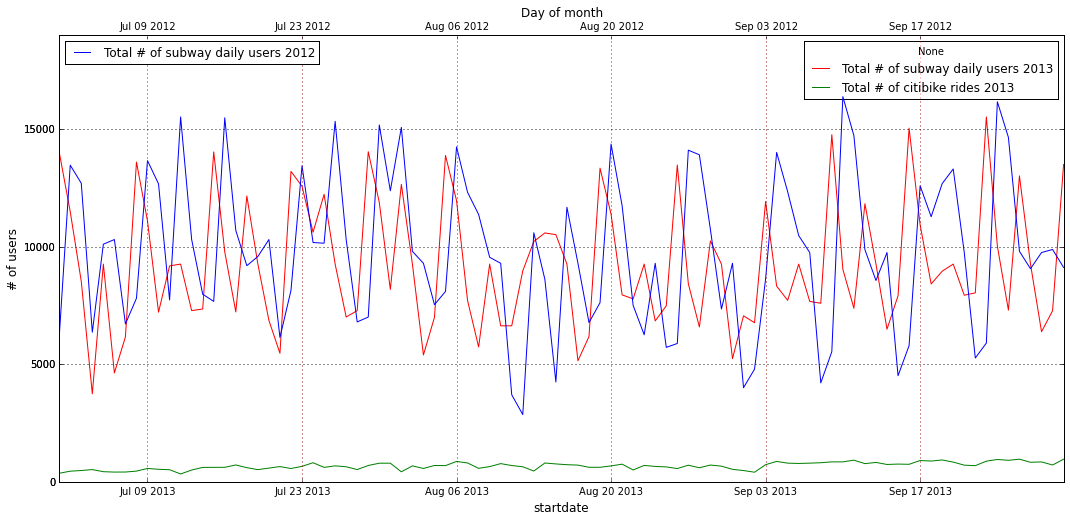

In [71]:
plt.figure(figsize=(18, 7))
ax1 = subsum13c.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users 2013", color = 'Red',
                              grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=4)

ax1.set_xlabel("Day of month", fontsize = 12)
ax1.set_ylabel("# of users", fontsize = 12)

bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides 2013",\
                                            color='green', grid=True, ax=ax1)
ax2 = ax1.twiny()
subsum12.users.plot(y='users', figsize=(18,8), label="Total # of subway daily users 2012", color = 'Blue',
                       grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=2)

ax2.grid(color="red", axis="x")
ax2.set_xlabel("Day of month", fontsize = 12)


In [72]:
bikesum13a = bikesum13.groupby('startdate').count()

In [73]:
sum2013 = pd.concat([bikesum13a, subsum13c], axis=1)

In [74]:
sumlist = ['tripduration' , 'users']
sum2013a = sum2013[sumlist]

In [75]:
users12 = pd.DataFrame(subsum12.users)
users13 = pd.DataFrame(sum2013a.users)
users1213 = pd.concat([users12.reset_index(), users13.reset_index()], axis=1, ignore_index=True)

In [76]:
users1213 = users1213.set_index([2])

In [77]:
users1213[4] = users1213[1]-users1213[3]

In [78]:
del users1213[0]

In [79]:
sum2013b = pd.concat([sum2013a, users1213], axis=1)

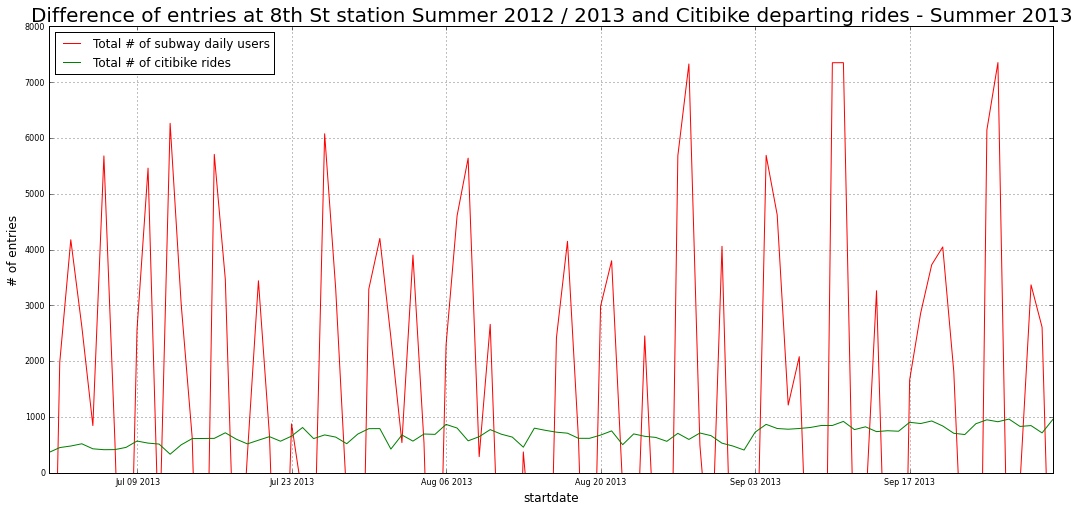

In [82]:
ax9 = users1213.plot(y=4 , figsize=(18,8), label="Total # of subway daily users", color = 'Red', \
                                                 grid=True, ylim = (0, 8000))
ax9.set_xlabel("Day of month", fontsize = 12)
ax9.set_ylabel("# of entries", fontsize = 12)
ax9.set_title("Difference of entries at 8th St station Summer 2012 / 2013 and Citibike departing rides - Summer 2013", fontsize = 20)
ax9.tick_params(labelsize = 8)
bikesum13.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax9)

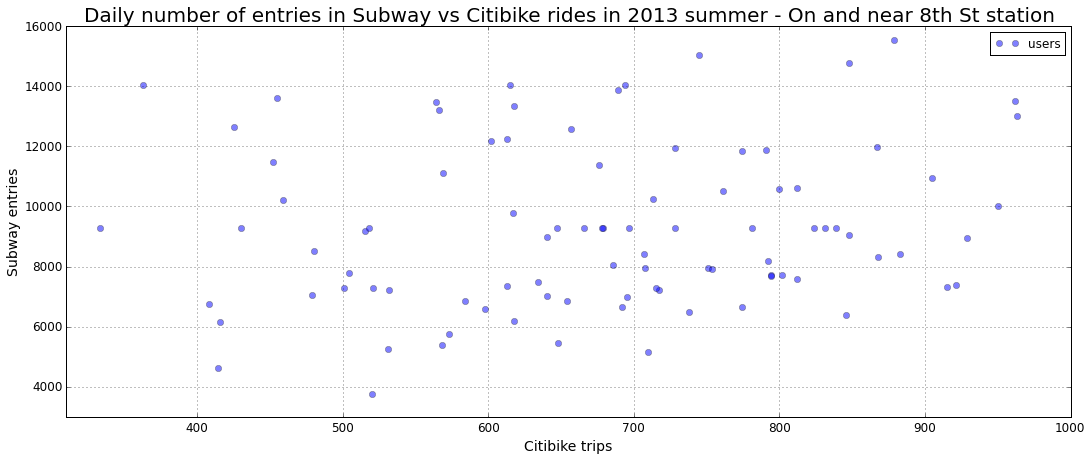

In [85]:
ax10 = sum2013a.plot(x ='tripduration', y ='users', style='o', xlim=(310 , 1000), ylim=(3000 , 16000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax10.set_xlabel("Citibike trips", fontsize = 14)
ax10.set_ylabel("Subway entries", fontsize = 14)
ax10.set_title("Daily number of entries in Subway vs Citibike rides in 2013 summer - On and near 8th St station", fontsize = 20)

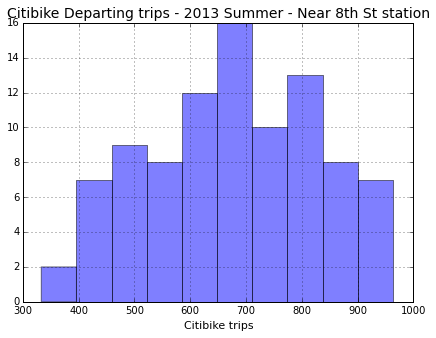

In [88]:
ax12 = sum2013a.tripduration.hist(grid=True, figsize=(7,5), alpha=0.5)
ax12.set_xlabel("Citibike trips", fontsize = 11)
ax12.set_title("Citibike Departing trips - 2013 Summer - Near 8th St station", fontsize = 14)

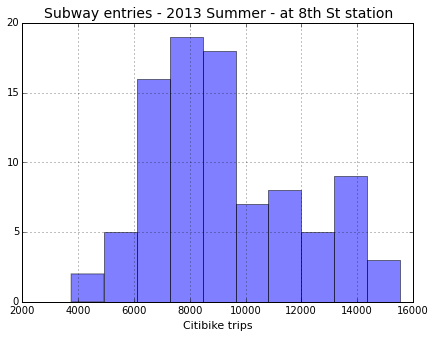

In [89]:
ax13 = sum2013a.users.hist(grid=True, figsize=(7,5), alpha=0.5)
ax13.set_xlabel("Citibike trips", fontsize = 11)
ax13.set_title("Subway entries - 2013 Summer - at 8th St station", fontsize = 14)

In [90]:
scipy.stats.pearsonr(sum2013a.users, sum2013a.tripduration)

(0.1373812517209782, 0.19158671507232591)

In [91]:
mod = smf.ols(formula='users ~ tripduration', data = sum2013a, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.731
Date:                Thu, 12 Nov 2015   Prob (F-statistic):              0.192
Time:                        12:09:45   Log-Likelihood:                -855.71
No. Observations:                  92   AIC:                             1715.
Df Residuals:                      90   BIC:                             1720.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     7607.9411   1291.537      5.891   

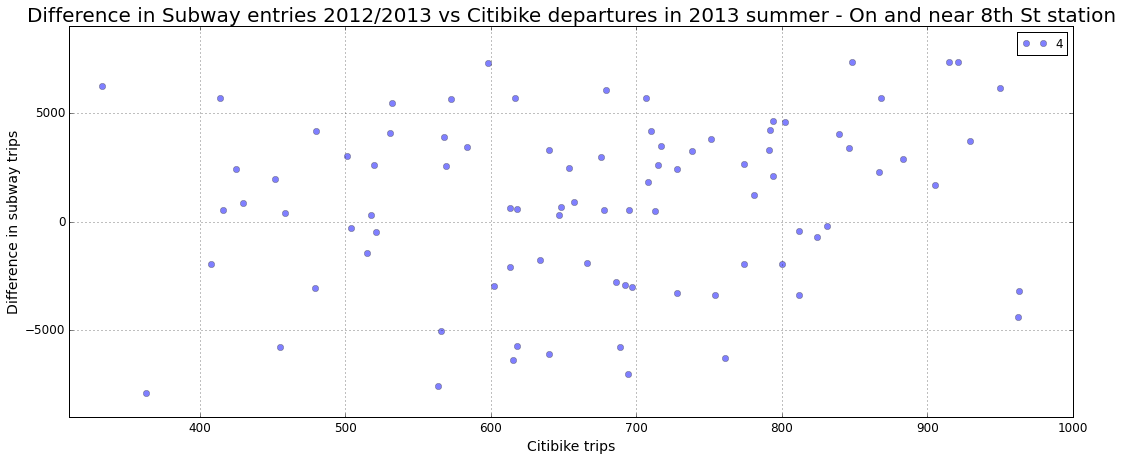

In [94]:
ax20 = sum2013b.plot(x ='tripduration', y =4, style='o', xlim=(310 , 1000), ylim=(-9000 , 9000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax20.set_xlabel("Citibike trips", fontsize = 14)
ax20.set_ylabel("Difference in subway trips", fontsize = 14)
ax20.set_title("Difference in Subway entries 2012/2013 vs Citibike departures in 2013 summer - On and near 8th St station", fontsize = 20)

In [93]:
scipy.stats.pearsonr(sum2013b[4], sum2013a.tripduration)

(0.055855940028773657, 0.59691689562649153)

In [95]:
c = url.urlopen("https://s3.amazonaws.com/tripdata/201407-citibike-tripdata.zip").read()
file= ZipFile(StringIO(c))
bikedata4 = file.open("2014-07 - Citi Bike trip data.csv")
july2014 = pd.read_csv(bikedata4, parse_dates=[0], infer_datetime_format=True)
print july2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [96]:
d = url.urlopen("https://s3.amazonaws.com/tripdata/201408-citibike-tripdata.zip").read()
file= ZipFile(StringIO(d))
bikedata5 = file.open("2014-08 - Citi Bike trip data.csv")
aug2014 = pd.read_csv(bikedata5, parse_dates=[0], infer_datetime_format=True)
print aug2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [97]:
e = url.urlopen("https://s3.amazonaws.com/tripdata/201409-citibike-tripdata.zip").read()
file= ZipFile(StringIO(e))
bikedata6 = file.open("201409-citibike-tripdata.csv")
sep2014 = pd.read_csv(bikedata6, parse_dates=[0], infer_datetime_format=True)
print sep2014.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')


In [98]:
bikesum14 = july2014.append([aug2014, sep2014])

In [99]:
CSlist = ['Washington Pl & Broadway', 'Washington Square E', 'LaGuardia Pl & W 3 St', 'Sullivan St & Washington Sq', \
         'MacDougal St & Washington Sq', 'Washington Pl & 6 Ave']
bikesum14a = bikesum14[bikesum14['start station name'].isin(CSlist)]
temp4 = pd.DatetimeIndex(bikesum14a['starttime'])
bikesum14a['startdate'] = temp4.date
bikesum14a['starttimes'] = temp4.time
del bikesum14a['starttime']

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


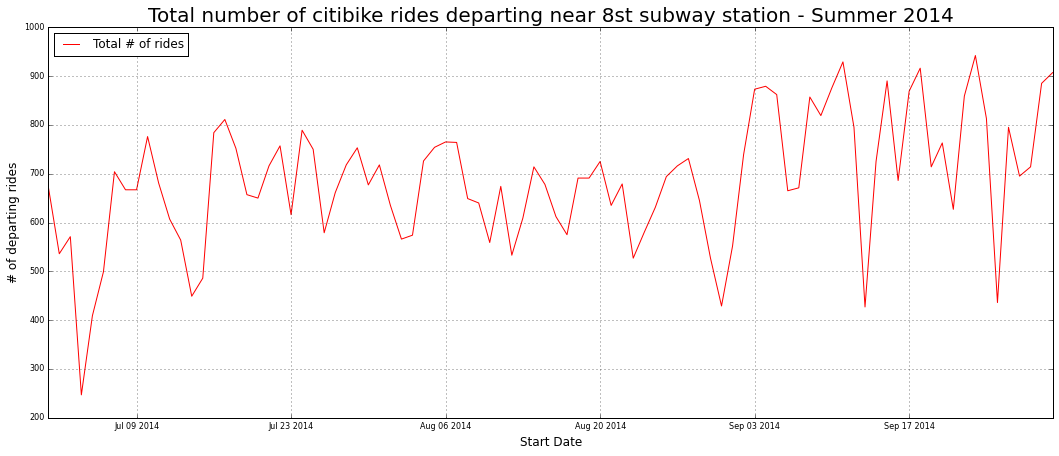

In [100]:
ax14 = bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,7), label="Total # of rides", color='red', \
                                                 grid=True)
ax14.set_xlabel("Start Date", fontsize = 12)
ax14.set_ylabel("# of departing rides", fontsize = 12)
ax14.set_title("Total number of citibike rides departing near 8st subway station - Summer 2014", fontsize = 20)
ax14.tick_params(labelsize = 8)

In [101]:
bikesum14a.groupby('startdate').count().tripduration.describe()

count     92.000000
mean     685.141304
std      130.885033
min      247.000000
25%      611.250000
50%      688.500000
75%      763.250000
max      942.000000
Name: tripduration, dtype: float64

In [102]:
subsum141 = pd.read_csv('turnstile_140705.txt')
subsum142 = pd.read_csv('turnstile_140712.txt')
subsum143 = pd.read_csv('turnstile_140719.txt')
subsum144 = pd.read_csv('turnstile_140726.txt')
subsum145 = pd.read_csv('turnstile_140802.txt')
subsum146 = pd.read_csv('turnstile_140809.txt')
subsum147 = pd.read_csv('turnstile_140816.txt')
subsum148 = pd.read_csv('turnstile_140823.txt')
subsum149 = pd.read_csv('turnstile_140830.txt')
subsum1410 = pd.read_csv('turnstile_140906.txt')
subsum1411 = pd.read_csv('turnstile_140913.txt')
subsum1412 = pd.read_csv('turnstile_140920.txt')
subsum1413 = pd.read_csv('turnstile_140927.txt')
subsum1414 = pd.read_csv('turnstile_141004.txt')

subsum14 = subsum141.append([subsum142, subsum143, subsum144, subsum145, subsum146, subsum147, subsum148\
                             , subsum149, subsum1410, subsum1411, subsum1412, subsum1413, subsum1414])
subsum14.columns

Index([u'C/A', u'UNIT', u'SCP', u'DATE1', u'TIME1', u'DESC1', u'ENTRIES1',
       u'EXITS1', u'DATE2', u'TIME2', u'DESC2', u'ENTRIES2', u'EXITS2',
       u'DATE3', u'TIME3', u'DESC3', u'ENTRIES3', u'EXITS3', u'DATE4',
       u'TIME4', u'DESC4', u'ENTRIES4', u'EXITS4', u'DATE5', u'TIME5',
       u'DESC5', u'ENTRIES5', u'EXITS5', u'DATE6', u'TIME6', u'DESC6',
       u'ENTRIES6', u'EXITS6', u'DATE7', u'TIME7', u'DESC7', u'ENTRIES7',
       u'EXITS7', u'DATE8', u'TIME8', u'DESC8', u'ENTRIES8', u'EXITS8'],
      dtype='object')

In [103]:
subsum14a = subsum14[subsum14["C/A"].isin(CAlist)]
subsum14a['DATE11'] = pd.to_datetime(subsum14a.DATE1)
subsum14a['DATE12'] = pd.DatetimeIndex(subsum14a['DATE11']).date

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [104]:
subsum14b = subsum14a.groupby(subsum14a.DATE12).sum()
subsum14b.tail()

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2014-09-29,132826000,28067913,132828839,28070436,132832925,28073436,132837486,28076214,132841219,28077222,132842404,28078236,132843274,28079933,132844923,28081235
2014-09-30,128456878,26103627,128460273,26105349,128462448,26106521,128464158,26107865,128466583,26109706,128469391,26110960,128471277,26111550,128473908,26112282
2014-10-01,52874063,49119231,52876828,49121107,52877632,49122776,52878244,49124722,52879446,49126049,52881940,49127652,52885449,49129887,52888794,49133105
2014-10-02,129321025,23064966,129322083,23067466,129322849,23068623,129324931,23069791,129327470,23071474,129331126,23074033,129335268,23076269,129338147,23079145
2014-10-03,128897410,15522465,128898554,15523195,123624745,12003822,123627559,12005278,122363947,11104735,5068811,2416365,1407510,283276,NaN,NaN


In [105]:
subsum14c = subsum14b.drop(subsum14b.index[[0, 1, 2, -1, -2, -3]])
subsum14c

,ENTRIES1,EXITS1,ENTRIES2,EXITS2,ENTRIES3,EXITS3,ENTRIES4,EXITS4,ENTRIES5,EXITS5,ENTRIES6,EXITS6,ENTRIES7,EXITS7,ENTRIES8,EXITS8
DATE12,,,,,,,,,,,,,,,,
2014-07-01,122511207,9156745,122514638,9158031,122516581,9158611,122518706,9159245,122519949,9159704,122520921,9161045,122522513,9162407,122526007,9164822
2014-07-02,26719079,22839005,26721190,22839702,26723086,22840216,26724008,22841280,26724543,22842237,26725658,22843636,26727442,22844706,26729596,22845529
2014-07-03,332807119,25375727,332809123,25376995,332810614,25378237,332812276,25380097,332814171,25381859,332815906,25383495,332817267,25384523,332818832,25385295
2014-07-04,129015816,25958356,117379818,24337222,115656259,14492271,11108772,9654404,8725253,5521365,8725557,5521572,NaN,NaN,NaN,NaN
2014-07-05,131552256,27147403,131552993,27147686,131553037,27147744,131553316,27148241,131554438,27149483,131556790,27151496,131559575,27153518,131561636,27154690
2014-07-06,168443505,52585589,168443855,52585744,168444354,52586115,168445833,52586944,168447755,52588338,168450075,52590083,168451403,52591327,168452847,52592441
2014-07-07,131157055,27629568,131159210,27630918,131162568,27633647,131165822,27635562,131168101,27637855,131168783,27638541,131169155,27639123,131170410,27639994
2014-07-08,132865102,28103729,132868364,28106263,132871645,28108149,132874192,28110211,132875633,28111759,132877329,28112999,132880197,28114631,132883220,28117240
2014-07-09,123128001,18204630,123130600,18206860,123132276,18207898,123133421,18208445,123134978,18209542,123136708,18211578,123138282,18213380,123140088,18215682


In [106]:
subsum14c['users'] = subsum14c.ENTRIES6-subsum14c.ENTRIES1
subsum14c.users

DATE12
2014-07-01         9714
2014-07-02         6579
2014-07-03         8787
2014-07-04   -120290259
2014-07-05         4534
2014-07-06         6570
2014-07-07        11728
2014-07-08        12227
2014-07-09         8707
2014-07-10        11106
2014-07-11   -117488979
2014-07-12         6127
2014-07-13         6916
2014-07-14        14446
2014-07-15        12441
2014-07-16         9807
2014-07-17         6034
2014-07-18    -16293030
2014-07-19         8083
2014-07-20         6515
2014-07-21         8221
2014-07-22        12878
2014-07-23        12327
2014-07-24        12453
2014-07-25    -11770224
2014-07-26         5111
2014-07-27         6574
2014-07-28        14002
2014-07-29        12865
2014-07-30         8111
                ...    
2014-09-01         7404
2014-09-02        11916
2014-09-03         9825
2014-09-04         7774
2014-09-05          NaN
2014-09-06         5879
2014-09-07         7873
2014-09-08        15568
2014-09-09        12724
2014-09-10        11456
2014-09-1

In [107]:
subsum14c.users[subsum14c.users < 0] = np.nan

C:\Users\juanpablo\Anaconda\lib\site-packages\IPython\kernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [108]:
subsum14c.users = subsum14c.users.fillna(subsum14c.users.mean())
subsum14c.users

DATE12
2014-07-01     9714.000000
2014-07-02     6579.000000
2014-07-03     8787.000000
2014-07-04     9674.759494
2014-07-05     4534.000000
2014-07-06     6570.000000
2014-07-07    11728.000000
2014-07-08    12227.000000
2014-07-09     8707.000000
2014-07-10    11106.000000
2014-07-11     9674.759494
2014-07-12     6127.000000
2014-07-13     6916.000000
2014-07-14    14446.000000
2014-07-15    12441.000000
2014-07-16     9807.000000
2014-07-17     6034.000000
2014-07-18     9674.759494
2014-07-19     8083.000000
2014-07-20     6515.000000
2014-07-21     8221.000000
2014-07-22    12878.000000
2014-07-23    12327.000000
2014-07-24    12453.000000
2014-07-25     9674.759494
2014-07-26     5111.000000
2014-07-27     6574.000000
2014-07-28    14002.000000
2014-07-29    12865.000000
2014-07-30     8111.000000
                  ...     
2014-09-01     7404.000000
2014-09-02    11916.000000
2014-09-03     9825.000000
2014-09-04     7774.000000
2014-09-05     9674.759494
2014-09-06     5879.0

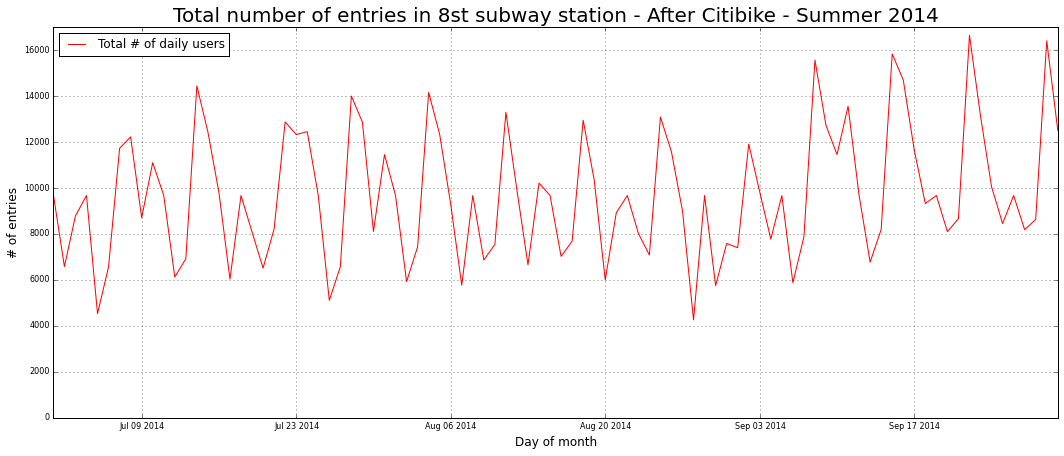

In [110]:
ax15 = subsum14c.plot(y='users', figsize=(18,7), label="Total # of daily users", color = 'Red', \
                                                 grid=True, ylim = (0, 17000))
ax15.set_xlabel("Day of month", fontsize = 12)
ax15.set_ylabel("# of entries", fontsize = 12)
ax15.set_title("Total number of entries in 8st subway station - After Citibike - Summer 2014", fontsize = 20)
ax15.tick_params(labelsize = 8)

In [111]:
subsum14c.users.describe()

count       92.000000
mean      9674.759494
std       2831.709219
min       4259.000000
25%       7576.250000
50%       9674.759494
75%      11775.000000
max      16648.000000
Name: users, dtype: float64

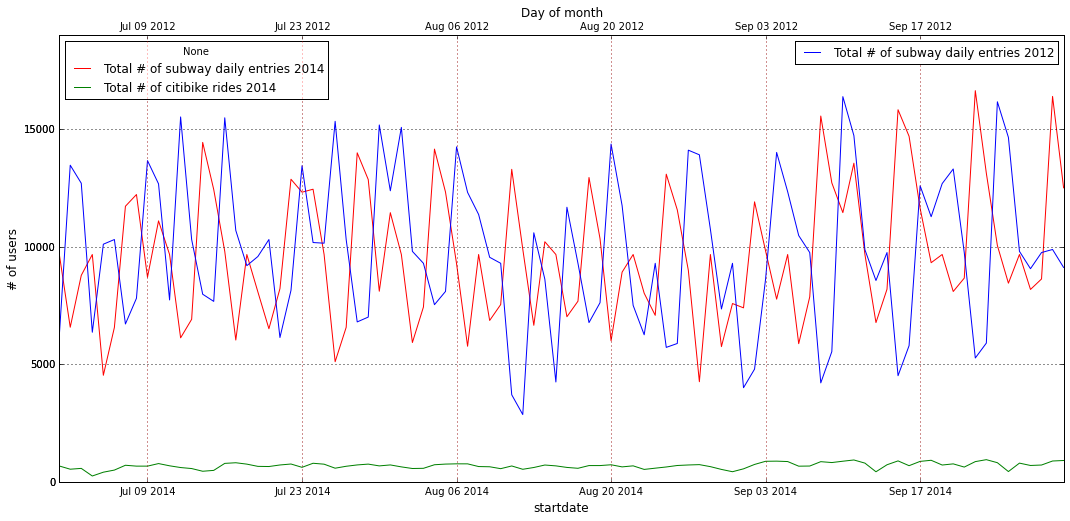

In [112]:
plt.figure(figsize=(18, 7))
ax1 = subsum14c.users.plot(y='users', figsize=(18,8), label="Total # of subway daily entries 2014", color = 'Red',
                              grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=4)

ax1.set_xlabel("Day of month", fontsize = 12)
ax1.set_ylabel("# of users", fontsize = 12)

bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides 2014",\
                                            color='green', grid=True, ax=ax1)
ax2 = ax1.twiny()
subsum12.users.plot(y='users', figsize=(18,8), label="Total # of subway daily entries 2012", color = 'Blue',
                       grid=True, ylim = (0, 19000))

pl.legend(ncol = 2, loc=1)

ax2.grid(color="red", axis="x")
ax2.set_xlabel("Day of month", fontsize = 12)

In [113]:
bikesum14b = bikesum14a.groupby('startdate').count()

In [114]:
sum2014 = pd.concat([bikesum14b, subsum14c], axis=1)

In [115]:
sum2014a = sum2014[sumlist]

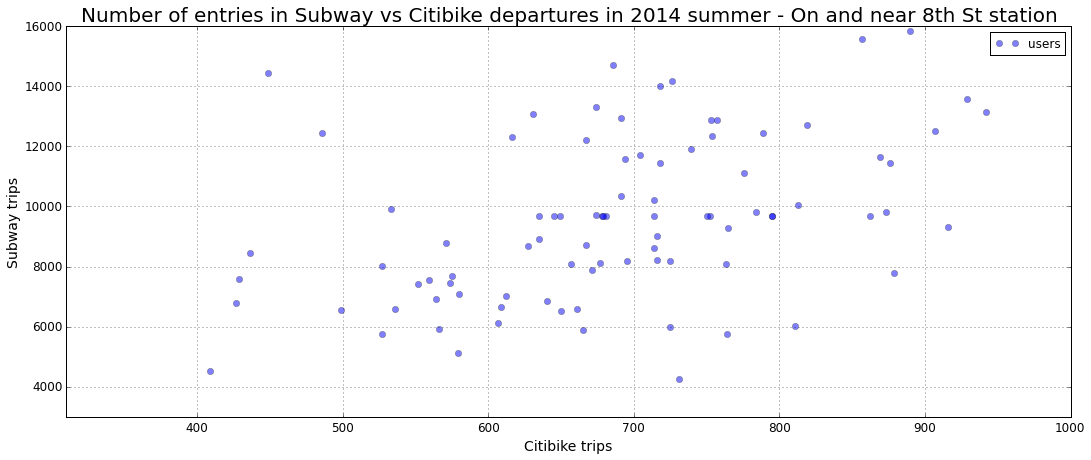

In [117]:
ax16 = sum2014a.plot(x ='tripduration', y ='users', style='o', xlim=(310 , 1000), ylim=(3000 , 16000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax16.set_xlabel("Citibike trips", fontsize = 14)
ax16.set_ylabel("Subway trips", fontsize = 14)
ax16.set_title("Number of entries in Subway vs Citibike departures in 2014 summer - On and near 8th St station", fontsize = 20)

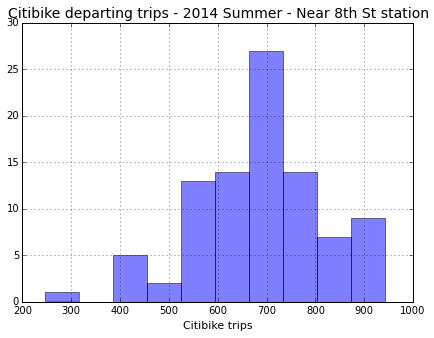

In [119]:
ax17 = sum2014a.tripduration.hist(grid=True, figsize=(7,5), alpha=0.5)
ax17.set_xlabel("Citibike trips", fontsize = 11)
ax17.set_title("Citibike departing trips - 2014 Summer - Near 8th St station", fontsize = 14)

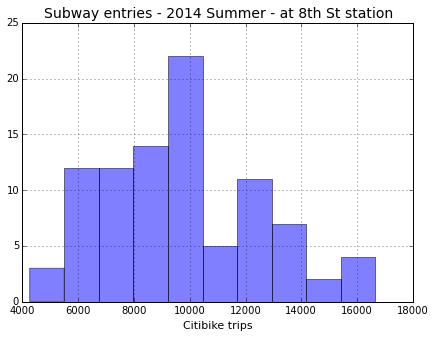

In [120]:
ax18 = sum2014a.users.hist(grid=True, figsize=(7,5), alpha=0.5)
ax18.set_xlabel("Citibike trips", fontsize = 11)
ax18.set_title("Subway entries - 2014 Summer - at 8th St station", fontsize = 14)

In [121]:
scipy.stats.pearsonr(sum2014a.users, sum2014a.tripduration)

(0.44293968606723289, 9.8050672709449809e-06)

In [122]:
mod = smf.ols(formula='users ~ tripduration', data = sum2014a, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  users   R-squared:                       0.196
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     21.97
Date:                Thu, 12 Nov 2015   Prob (F-statistic):           9.81e-06
Time:                        12:16:02   Log-Likelihood:                -851.27
No. Observations:                  92   AIC:                             1707.
Df Residuals:                      90   BIC:                             1712.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     3109.0236   1425.913      2.180   

In [123]:
users14 = pd.DataFrame(sum2014a.users)
users1214 = pd.concat([users12.reset_index(), users14.reset_index()], axis=1, ignore_index=True)

In [124]:
users1214 = users1214.set_index([2])
users1214[4] = users1214[1]-users1214[3]

In [125]:
del users1214[0]
sum2014b = pd.concat([sum2014a, users1214], axis=1)

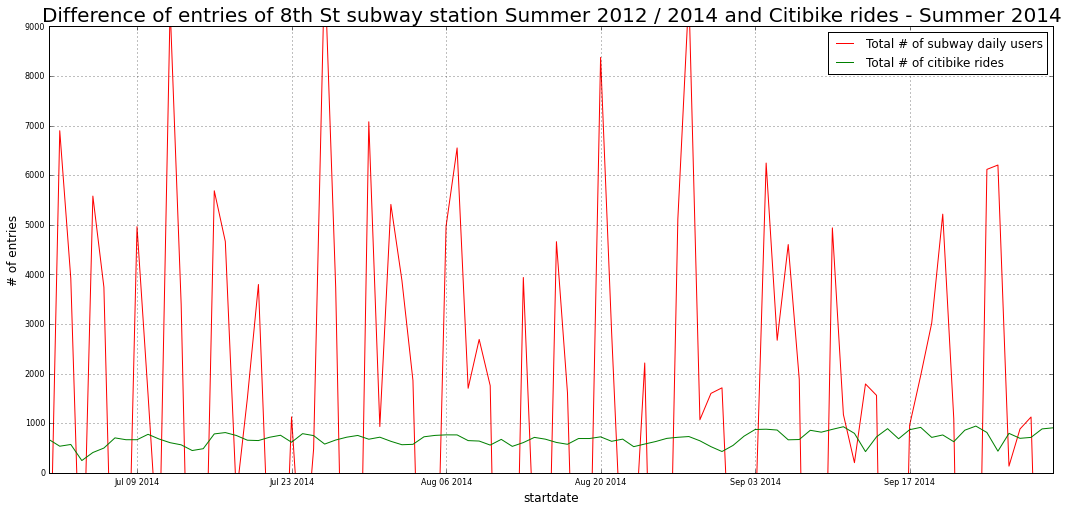

In [126]:
ax20 = users1214.plot(y=4 , figsize=(18,8), label="Total # of subway daily users", color = 'Red', \
                                                 grid=True, ylim = (0, 9000))
ax20.set_xlabel("Day of month", fontsize = 12)
ax20.set_ylabel("# of entries", fontsize = 12)
ax20.set_title("Difference of entries of 8th St subway station Summer 2012 / 2014 and Citibike rides - Summer 2014", fontsize = 20)
ax20.tick_params(labelsize = 8)
bikesum14a.groupby('startdate').count().plot(y='tripduration', figsize=(18,8), label="Total # of citibike rides", color='green', \
                                                 grid=True, ax=ax20)

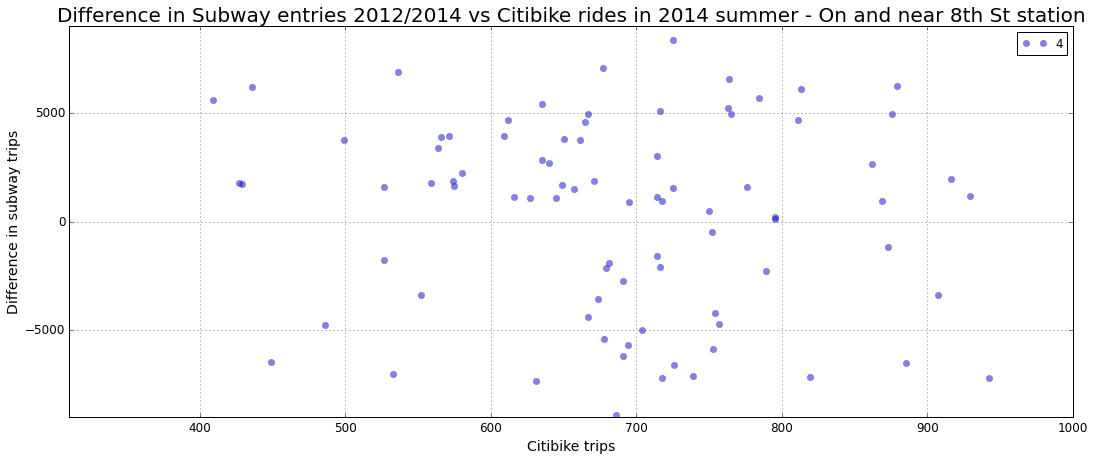

In [127]:
ax21 = sum2014b.plot(x ='tripduration', y =4, style='o', xlim=(310 , 1000), ylim=(-9000 , 9000), grid=True, figsize=(18,7), \
                fontsize = 12, alpha=0.5)
ax21.set_xlabel("Citibike trips", fontsize = 14)
ax21.set_ylabel("Difference in subway trips", fontsize = 14)
ax21.set_title("Difference in Subway entries 2012/2014 vs Citibike rides in 2014 summer - On and near 8th St station", fontsize = 20)

In [128]:
scipy.stats.pearsonr(sum2014b[4], sum2014b.tripduration)

(-0.18297311147769418, 0.080847223719108838)

In [129]:
del sum2014b[3]

In [130]:
sum2014b.head()

,tripduration,users,1,4
startdate,,,,
2014-07-01,674,9714.000000,6147,-3567.000000
2014-07-02,536,6579.000000,13476,6897.000000
2014-07-03,571,8787.000000,12707,3920.000000
2014-07-04,247,9674.759494,6365,-3309.759494
2014-07-05,409,4534.000000,10113,5579.000000


In [131]:
names = ['bikerides','users12','users14','difference']
sum2014b.columns = [names]

In [132]:
mod = smf.ols(formula='difference ~ bikerides', data = sum2014b, missing='drop').fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:             difference   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     3.117
Date:                Thu, 12 Nov 2015   Prob (F-statistic):             0.0808
Time:                        12:17:07   Log-Likelihood:                -914.39
No. Observations:                  92   AIC:                             1833.
Df Residuals:                      90   BIC:                             1838.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   5027.6460   2831.852      1.775      0.0